## Importing necessary libraries

In [1]:
from featuer_extraction import extract_features_from_info
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

## Load the original data

In [2]:
path_to_data = 'data/ECU_IoHT.xlsx'
data = pd.read_excel(path_to_data)

### Show the first five rows in data

In [3]:
data.head()

,No.,Time,Source,Destination,Protocol,Length,Info,Type,Type of attack
0,1,0.000000,Alfa_97:cf:63,Broadcast,ARP,42,Who has 192.168.43.1? Tell 192.168.43.186,Attack,ARP Spoofing
1,2,0.002956,6e:c7:ec:3c:f2:ba,Alfa_97:cf:63,ARP,42,192.168.43.1 is at 6e:c7:ec:3c:f2:ba,Attack,ARP Spoofing
2,3,0.200725,Alfa_97:cf:63,Broadcast,ARP,42,Who has 192.168.43.1? Tell 192.168.43.186,Attack,ARP Spoofing
3,4,0.202713,192.168.43.186,192.168.43.1,DNS,85,Standard query 0x0c44 PTR 1.43.168.192.in-addr...,Normal,No Attack
4,5,0.411565,6e:c7:ec:3c:f2:ba,Alfa_97:cf:63,ARP,42,192.168.43.1 is at 6e:c7:ec:3c:f2:ba,Attack,ARP Spoofing


### the shape of data before extraction of the feature

In [4]:
data.shape

(111207, 9)

### the original columns in the dataset

In [5]:
data.columns

Index(['No.', 'Time', 'Source', 'Destination', 'Protocol', 'Length', 'Info',
       'Type', 'Type of attack'],
      dtype='object')

## Applying the extraction function on `Info` column

In [6]:
df = extract_features_from_info(data)

### Show the first five rows in data after extraction

In [7]:
df.head()

,No.,Time,Source,Destination,Protocol,Length,Info,Type,Type of attack,source_port,...,tsecr,ws,urg,sack_perm,ttl,seq_ack,ack_num,who_has_ip,tell_ip,rest_of_info
0,1,0.000000,Alfa_97:cf:63,Broadcast,ARP,42,Who has 192.168.43.1? Tell 192.168.43.186,Attack,ARP Spoofing,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,192.168.43.1,192.168.43.186,
1,2,0.002956,6e:c7:ec:3c:f2:ba,Alfa_97:cf:63,ARP,42,192.168.43.1 is at 6e:c7:ec:3c:f2:ba,Attack,ARP Spoofing,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,192.168.43.1 is at 6e:c7:ec:3c:f2:ba
2,3,0.200725,Alfa_97:cf:63,Broadcast,ARP,42,Who has 192.168.43.1? Tell 192.168.43.186,Attack,ARP Spoofing,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,192.168.43.1,192.168.43.186,
3,4,0.202713,192.168.43.186,192.168.43.1,DNS,85,Standard query 0x0c44 PTR 1.43.168.192.in-addr...,Normal,No Attack,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard query PTR 1.43.168.192.in-addr.arpa
4,5,0.411565,6e:c7:ec:3c:f2:ba,Alfa_97:cf:63,ARP,42,192.168.43.1 is at 6e:c7:ec:3c:f2:ba,Attack,ARP Spoofing,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,192.168.43.1 is at 6e:c7:ec:3c:f2:ba


### the shape of data after extraction of the feature

In [8]:
df.shape

(111207, 28)

### The columns of dataset after extraction

In [9]:
df.columns

Index(['No.', 'Time', 'Source', 'Destination', 'Protocol', 'Length', 'Info',
       'Type', 'Type of attack', 'source_port', 'destination_port', 'seq',
       'transaction_id', 'length', 'win', 'mss', 'ack', 'tsval', 'tsecr', 'ws',
       'urg', 'sack_perm', 'ttl', 'seq_ack', 'ack_num', 'who_has_ip',
       'tell_ip', 'rest_of_info'],
      dtype='object')

#### Showing only the columns added

In [10]:
new_col = [col for col in df.columns if col not in data.columns]
new_col

['source_port',
 'destination_port',
 'seq',
 'transaction_id',
 'length',
 'win',
 'mss',
 'ack',
 'tsval',
 'tsecr',
 'ws',
 'urg',
 'sack_perm',
 'ttl',
 'seq_ack',
 'ack_num',
 'who_has_ip',
 'tell_ip',
 'rest_of_info']

## Data Cleaning

### columns to drop

In [11]:
columns_to_drop = ['No.', 'Info', 'rest_of_info']
df = df.drop(columns_to_drop, axis= 1)
df.columns

Index(['Time', 'Source', 'Destination', 'Protocol', 'Length', 'Type',
       'Type of attack', 'source_port', 'destination_port', 'seq',
       'transaction_id', 'length', 'win', 'mss', 'ack', 'tsval', 'tsecr', 'ws',
       'urg', 'sack_perm', 'ttl', 'seq_ack', 'ack_num', 'who_has_ip',
       'tell_ip'],
      dtype='object')

### drop the columns with inferior to 1000 not null value 

In [12]:
cols_not_null_inferior1000 = df.loc[:,df.notna().sum() <= 1000].columns
print("the columns with the value of not null inferior to 1000:")
cols_not_null_inferior1000.to_list()

the columns with the value of not null inferior to 1000:


['ws', 'urg', 'sack_perm', 'seq_ack', 'ack_num']

In [13]:
print('Showing how much NULL values in those columns.')
df[cols_not_null_inferior1000].isnull().sum()

Showing how much NULL values in those columns.


ws           110805
urg          111198
sack_perm    110805
seq_ack      110998
ack_num      110998
dtype: int64

#### drop these columns

In [14]:
df_cleaned1 = df.drop(cols_not_null_inferior1000, axis=1)
print('shape of data frame before droping the columns: ', df.shape)
print('shape of data frame after droping the columns: ', df_cleaned1.shape)

shape of data frame before droping the columns:  (111207, 25)
shape of data frame after droping the columns:  (111207, 20)


### Encoding the categorical columns 

In [15]:
numerical_columns = df_cleaned1.select_dtypes(include=['number']).columns
categorical_columns = df_cleaned1.select_dtypes(include=['object']).columns
print("Numerical columns:")
print(numerical_columns)

print("\nCategorical columns:")
print(categorical_columns)

Numerical columns:
Index(['Time', 'Length', 'source_port', 'destination_port', 'seq',
       'transaction_id', 'length', 'win', 'mss', 'ack', 'tsval', 'tsecr',
       'ttl'],
      dtype='object')

Categorical columns:
Index(['Source', 'Destination', 'Protocol', 'Type', 'Type of attack',
       'who_has_ip', 'tell_ip'],
      dtype='object')


#### encoding the four columns that has IP address

In [16]:
columns_have_ip = ['Source', 'Destination', 'who_has_ip', 'tell_ip']

In [17]:
IP_sets = [set(df_cleaned1[col].unique()) for col in columns_have_ip]
for IP_set, col in zip(IP_sets, columns_have_ip):
    print(f'The {col} column contains repetitions of {len(IP_set)} unique IP addresses.')

The Source column contains repetitions of 69 unique IP addresses.
The Destination column contains repetitions of 71 unique IP addresses.
The who_has_ip column contains repetitions of 256 unique IP addresses.
The tell_ip column contains repetitions of 3 unique IP addresses.


In [18]:
for IP_set1, col1 in zip(IP_sets, columns_have_ip):
    for IP_set2, col2 in zip(IP_sets, columns_have_ip):  
        if col1 != col2:
            print(f'the common IPs between "{col1}" and "{col2}" are {len(IP_set1 & IP_set2)}')

the common IPs between "Source" and "Destination" are 69
the common IPs between "Source" and "who_has_ip" are 3
the common IPs between "Source" and "tell_ip" are 2
the common IPs between "Destination" and "Source" are 69
the common IPs between "Destination" and "who_has_ip" are 3
the common IPs between "Destination" and "tell_ip" are 2
the common IPs between "who_has_ip" and "Source" are 3
the common IPs between "who_has_ip" and "Destination" are 3
the common IPs between "who_has_ip" and "tell_ip" are 3
the common IPs between "tell_ip" and "Source" are 2
the common IPs between "tell_ip" and "Destination" are 2
the common IPs between "tell_ip" and "who_has_ip" are 3


In [22]:
all_IPs = IP_sets[0] | IP_sets[1] | IP_sets[2] | IP_sets[3]
print(f'all IP adresses in the dataset: {len(all_IPs)}')

all IP adresses in the dataset: 324


##### Create an encoder that assigns a unique number to each IP.

In [35]:
ip_to_num = {
    ip: i for i, ip in enumerate(all_IPs) 
}
ip_to_num[np.nan] = np.nan

In [36]:
ip_to_num[np.nan]

nan

##### Applying this encoder

In [37]:
for col in columns_have_ip:
    df_cleaned1[col] = df_cleaned1[col].apply(lambda ip: ip_to_num[ip])

In [38]:
df_cleaned1[columns_have_ip].dtypes

Source           int64
Destination      int64
who_has_ip     float64
tell_ip        float64
dtype: object

All IP addresses have been changed to numeric form

#### Encoding the remaining columns.

In [39]:
resr_categorical_columns = df_cleaned1.select_dtypes(include=['object']).columns
print(f"the remaining columns that need to be encoded:\n{resr_categorical_columns.to_list()}")

the remaining columns that need to be encoded:
['Protocol', 'Type', 'Type of attack']


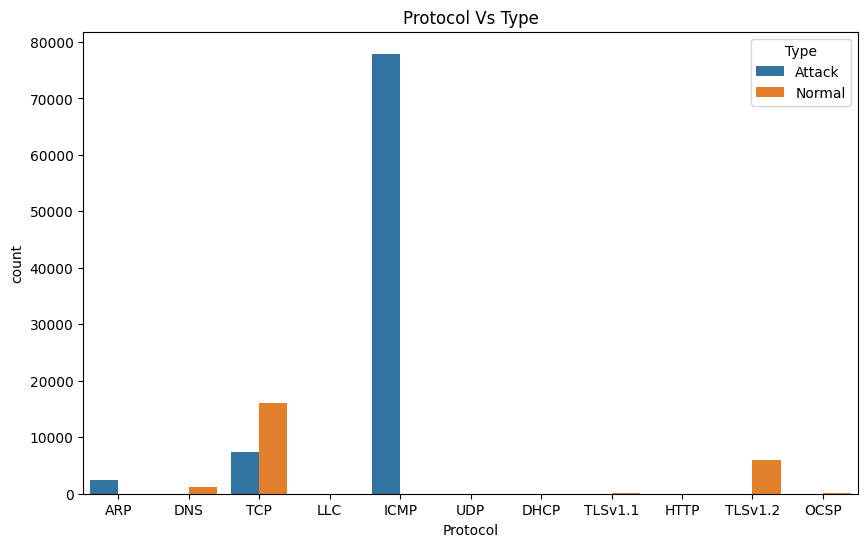

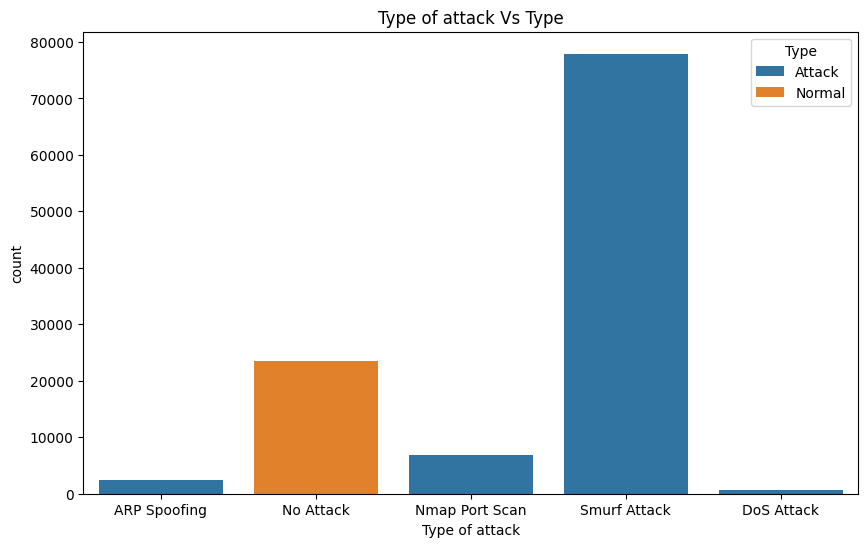

In [40]:
for column in resr_categorical_columns:
    if column != 'Type':
        plt.figure(figsize=(10,6))
        sns.countplot(x=column, hue='Type', data= data)
        plt.title(f'{column} Vs Type')
        plt.show()

ARP Spoofing, Nmap Port Scan, Smurf Attack, and DoS Attack are all types of attacks. 'No Attack' defines normal. This means that the 'Type of Attack' and 'Type' columns have the same functionality, and we will keep the 'Type' column, which is more logical.

In [41]:
df_cleaned1 = df_cleaned1.drop(['Type of attack'], axis=1)

##### Use one hot encoder on the Protocol column

In [42]:
df_cleaned1['Protocol'].unique()

array(['ARP', 'DNS', 'TCP', 'LLC', 'ICMP', 'UDP', 'DHCP', 'TLSv1.1',
       'HTTP', 'TLSv1.2', 'OCSP'], dtype=object)

In [43]:
encoded_data = pd.get_dummies(df_cleaned1, columns=['Protocol'], dtype= np.int32)

print(encoded_data.columns)

Index(['Time', 'Source', 'Destination', 'Length', 'Type', 'source_port',
       'destination_port', 'seq', 'transaction_id', 'length', 'win', 'mss',
       'ack', 'tsval', 'tsecr', 'ttl', 'who_has_ip', 'tell_ip', 'Protocol_ARP',
       'Protocol_DHCP', 'Protocol_DNS', 'Protocol_HTTP', 'Protocol_ICMP',
       'Protocol_LLC', 'Protocol_OCSP', 'Protocol_TCP', 'Protocol_TLSv1.1',
       'Protocol_TLSv1.2', 'Protocol_UDP'],
      dtype='object')


In [44]:
len(encoded_data.columns)

29

##### Use label encoder on the Type column

In [45]:
type_encoder = {'Attack': 1, 'Normal': 0}
type_encoder_inverse = {v:k for k, v in type_encoder.items()}
encoded_data['Type'] = encoded_data['Type'].map(type_encoder)

In [46]:
encoded_data['Type'].unique(), type_encoder_inverse

(array([1, 0]), {1: 'Attack', 0: 'Normal'})

In [47]:
len(encoded_data.select_dtypes(include=['number']).columns)

29

### Missing values

#### Ploting the correlation matrix

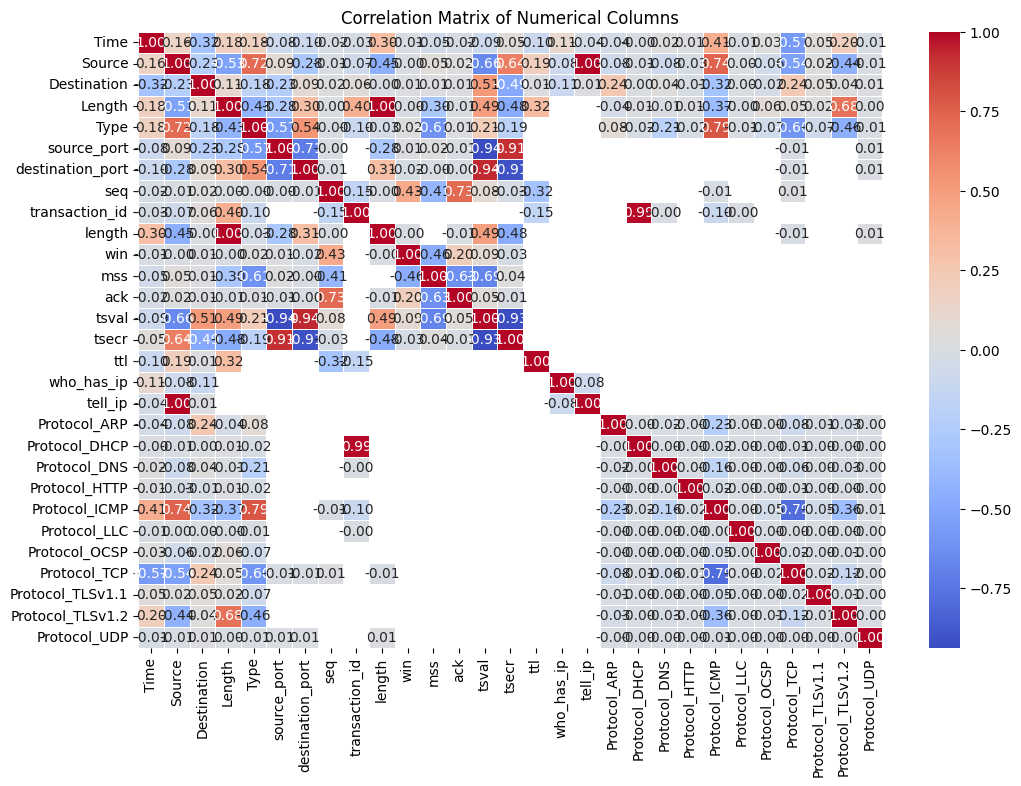

In [ ]:

correlation_matrix = encoded_data.corr()

# Set up the matplotlib figure
plt.figure(figsize=(12, 8))

# Generate a heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

# Show the plot
plt.title("Correlation Matrix of Numerical Columns")
plt.show()

In [56]:
columns_to_drop = ['length', 'Protocol_UDP', 'tell_ip', 'transaction_id', 'Protocol_TLSv1.1']
encoded_df = encoded_data.drop(columns_to_drop, axis=1)

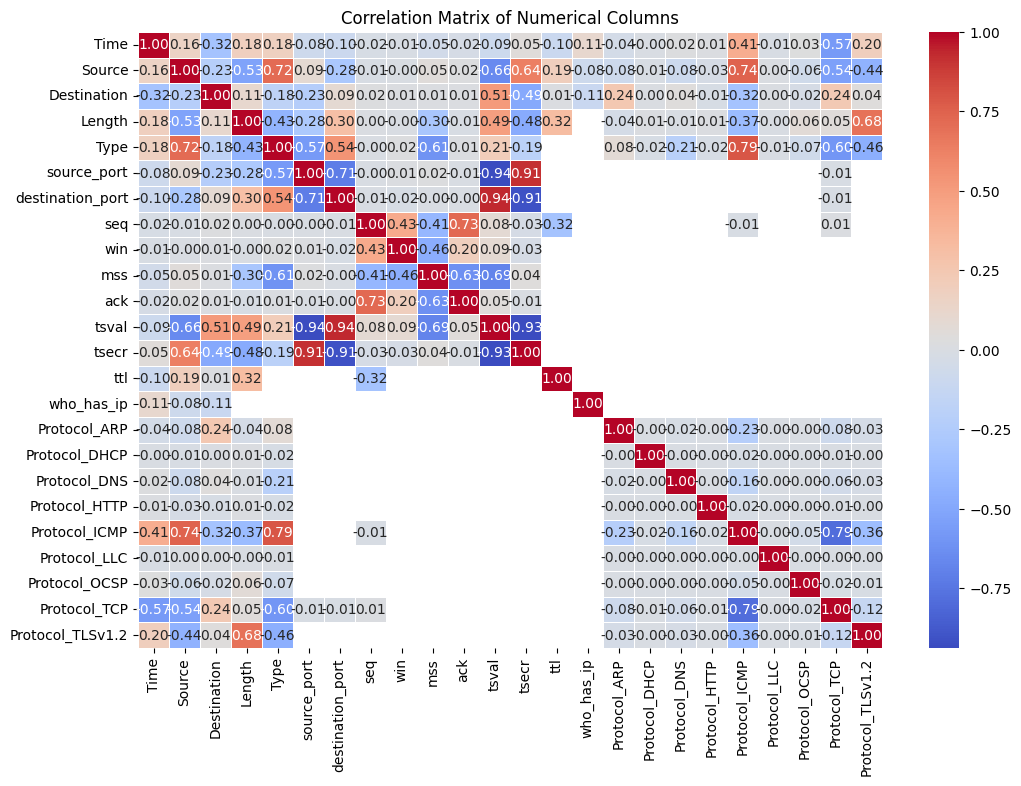

In [58]:
correlation_matrix = encoded_df.corr()

# Set up the matplotlib figure
plt.figure(figsize=(12, 8))

# Generate a heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

# Show the plot
plt.title("Correlation Matrix of Numerical Columns")
plt.show()

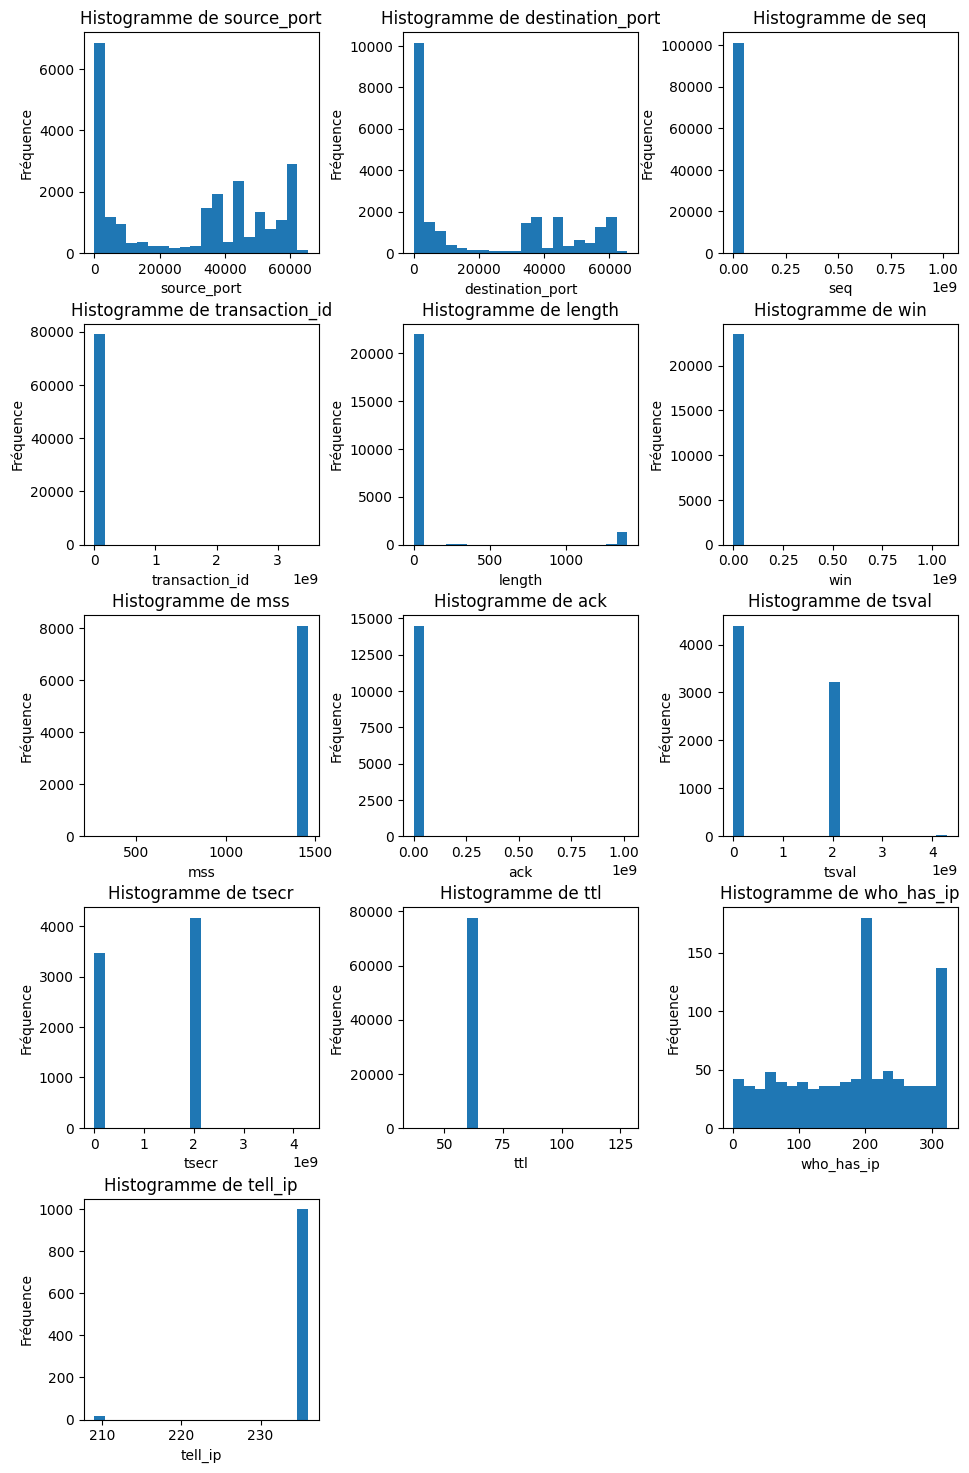

In [49]:
df = encoded_data.copy()
numerical_cols = df.select_dtypes(include=np.number).columns
numerical_cols = numerical_cols[encoded_data.isna().any()]

num_cols = len(numerical_cols)
num_rows = (num_cols + 2) // 3  
fig, axes = plt.subplots(nrows=num_rows, ncols=3, figsize=(10, 3 * num_rows))
fig.tight_layout(pad=3.0)

for i, col in enumerate(numerical_cols):
  row = i // 3
  col_idx = i % 3
  ax = axes[row, col_idx]
  ax.hist(df[col], bins=20)
  ax.set_title(f'Histogramme de {col}')
  ax.set_xlabel(col)
  ax.set_ylabel('Fréquence')

for i in range(num_cols, num_rows * 3):
  row = i // 3
  col_idx = i % 3
  fig.delaxes(axes[row, col_idx])

plt.show()

In [ ]:
encoded_data.as

Time                float64
Source                int64
Destination           int64
Length                int64
Type                  int64
source_port         float64
destination_port    float64
seq                 float64
transaction_id      float64
length              float64
win                 float64
mss                 float64
ack                 float64
tsval               float64
tsecr               float64
ttl                 float64
who_has_ip            int64
tell_ip               int64
Protocol_ARP          int32
Protocol_DHCP         int32
Protocol_DNS          int32
Protocol_HTTP         int32
Protocol_ICMP         int32
Protocol_LLC          int32
Protocol_OCSP         int32
Protocol_TCP          int32
Protocol_TLSv1.1      int32
Protocol_TLSv1.2      int32
Protocol_UDP          int32
dtype: object